In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib Notebook

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [4]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [5]:
data=pd.read_csv("Mall_Customers.csv")

In [6]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
#encode Male and Female Labels to 0 1 

In [104]:
def encoding_labels(data_,col_name,file_name):
    """this function takes the DataFrame, column name and the file name
    then encodes the catigorical variable using LabelEncoder & OneHotEncoder 
    and save the new data frame to a csv file 
    then returns the encoder instance, the Dataframe with the encoded variables with two additional columns Male-Female 
    and another dataframe with encoded gender column """
    
    data_lbl=data_.copy()
    data_pure=data_.copy()

    gender_encoding=LabelEncoder()
    gender_labels=gender_encoding.fit_transform(data_pure["Gender"])
    
    encoding_objects={}
    
    for cols in data_pure.columns:
        if data_pure[cols].dtype=="object":
            encoding_objects[cols]=LabelEncoder()
            data_pure[cols]=encoding_objects[cols].fit_transform(data_pure[cols])
            
    #print(encoding_objects)
    
    gender_lbl_enc=LabelEncoder()
    gender_1_hot_enc=OneHotEncoder()
    
    data_lbl["Gender"]=gender_lbl_enc.fit_transform(data_lbl["Gender"])
    gender_values=gender_1_hot_enc.fit_transform(data_lbl["Gender"].values.reshape(-1,1)).toarray()
    
    #print(gender_values)
    #print(data_lbl["Gender"])
    
    cols_gender=gender_lbl_enc.inverse_transform(data_lbl["Gender"].unique())
    for i in range(len(cols_gender)):
        data_lbl[cols_gender[i]]=gender_values[:,i]
    #print(cols_gender)
    
    data_lbl.to_csv(file_name,index=False)
    data_pure.to_csv("encoded_labeled_df",index=False)
    return gender_lbl_enc, data_lbl, data_pure

In [9]:
#retrieve the labels Female and male 

In [10]:
def inverse_labels_to_csv(data_,col_name,encoder_,file_name):
    """Function that takes the dataFrame, Column name, encoder instance, and file name 
    then saves the new Dataframe with the Catigorical Labels(Male&Female)"""
    
    data_fm=data_.copy()
    data_fm[col_name]=encoder_.inverse_transform(data_fm[col_name])
    
    data_fm.to_csv(file_name,index=False)
    

In [11]:
#creating elbow graph to choose the best k 

In [12]:
def elbow_Validation(x_train,k):
    """this function takes x_train set and the number of clusters to be validated 
    then show a graph to choose the best number of clusters (elbow method) """
    ks=range(1,10)
    inertias=[]
    for k in ks:
        model=KMeans(n_clusters=k)
        model.fit(X_train)
        inertias.append(model.inertia_)
    plt.plot(ks,inertias,"-o")
    plt.xlabel("number of clusters")
    plt.ylabel("inertia")
    plt.show()
    

In [13]:
#predting classes using Kmeans 

In [14]:
def kmeans_Clustering_predict(x_train,x_test,the_best_k_):
    """this funcation takes the training set and testing set and the number of clusters
    then returns the predicted values of the test set and Kmeans instance """
    pipe=make_pipeline(KMeans(n_clusters=5))
    pipe.fit(X_train)
    y_pred=pipe.predict(X_test)
    y_pred

    return y_pred, pipe
    

In [15]:
#showing Kmeans graph 

In [16]:
def kmeans_Clustering_graph(x_test,x,y,y_predd):
    """this function takes the test set, the original labels and the predicted labels 
    then show a graph if Kmeans Clustering results"""
    plt.scatter(X_test["Annual Income (k$)"],X_test["Spending Score (1-100)"],c=y_predd,marker='x')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

In [17]:
def data_labeling(data_,pipe_):
    """this function takes the dataframe and the Kmeans instance
    to label it then saves and returns the labeld data frame"""
    data_predict=data_.iloc[:,2:]
    labeled_dataframe=data_.copy()
    labeled_dataframe["Labels"]=0
    new_labls=pipe_.predict(data_predict)
    for i in range(200):
        labeled_dataframe.iloc[i,5]=new_labls[i]
    labeled_dataframe.to_csv("My_labeld_data",index=False)
    return labeled_dataframe
    

In [23]:
#both the original data frame and the labeled data frame can be used 
#as the gender column will not be fed to the model (it reduces the Kmeans performance)
#here I will use the original data to train, test and label the dataframe

In [24]:
#feature selection (Age, Annual Income, Spending Score)

In [25]:
data_mdl=data.iloc[:,2:]

In [26]:
#deviding the dataset into .8 Training Set and .2 Testing Set 

In [27]:
X_train =  data_mdl.sample(160,random_state=42)
X_test =  data_mdl.sample(40,random_state=42)

In [28]:
#using elbow method we can choose the K with low inertia

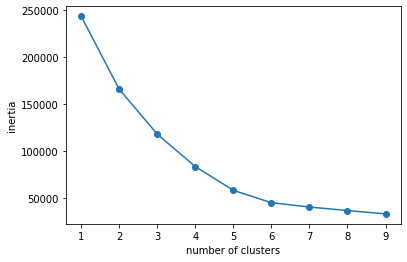

In [29]:
elbow_Validation(X_train,10)

In [30]:
#the best choice is K=5 

In [31]:
k=5

In [32]:
#calling kmeans_Clustering_predict will predict the outcome of the test set 

In [33]:
y_p,m_pipe=kmeans_Clustering_predict(X_train,X_test,k)
m_pipe

Pipeline(memory=None,
         steps=[('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=5, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)

In [34]:
#calling kmeans_Clustering_graph and feeding it the predected values for the test set y_p 
#will show a graph of clustered data 

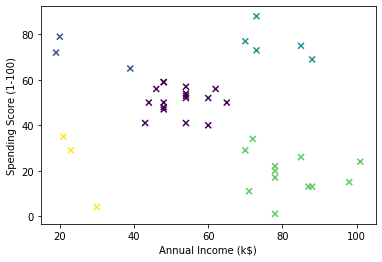

In [35]:
kmeans_Clustering_graph(X_test,"Annual Income (k$)","Spending Score (1-100)",y_p)

In [36]:
# calling data_labeling and feeding it the data & the instance of the model (m_pipe) will label the dataframe 

In [37]:
lb_df=data_labeling(data,m_pipe)
lb_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Labels
0,1,Male,19,15,39,4
1,2,Male,21,15,81,1
2,3,Female,20,16,6,4
3,4,Female,23,16,77,1
4,5,Female,31,17,40,4


In [87]:
My_labeld_data=pd.read_csv("My_labeld_data")
My_labeld_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Labels
0,1,Male,19,15,39,4
1,2,Male,21,15,81,1
2,3,Female,20,16,6,4
3,4,Female,23,16,77,1
4,5,Female,31,17,40,4


In [ ]:
# file name to save the encoded dataframe the is in form of 0 1 (One hot Encoder)


In [95]:
file_name_1= "Customers_Data_encoded____"

In [ ]:
# file name2 to retrieve the original categories (Male-Female)

In [97]:
file_name_2="Customers_Data_Full______"

In [105]:
encoder,enc_df,pure_df=encoding_labels(My_labeld_data,"Gender",file_name_1)

D:\programs\anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [92]:
pure_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Labels
0,1,1,19,15,39,4
1,2,1,21,15,81,1
2,3,0,20,16,6,4
3,4,0,23,16,77,1
4,5,0,31,17,40,4


In [99]:
#retrieve the original categories for Gender columns and save the dataframe with Gender (Female,Male) and Labels(0,1,2,3,4)
#only incase we used the data frame with encoded gender values 

In [100]:
inverse_labels_to_csv(pure_df,"Gender",encoder,file_name_2)

In [101]:
pd.read_csv(file_name_2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Labels
0,1,Male,19,15,39,4
1,2,Male,21,15,81,1
2,3,Female,20,16,6,4
3,4,Female,23,16,77,1
4,5,Female,31,17,40,4
5,6,Female,22,17,76,1
6,7,Female,35,18,6,4
7,8,Female,23,18,94,1
8,9,Male,64,19,3,4
9,10,Female,30,19,72,1
